In [1]:
import xarray as xr
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set runing dates:
startday = [dt.datetime(2016,12,25)+dt.timedelta(days=i) for i in range(int(406))]
# print(len(startday))
folders = [dt.datetime(2016,12,25)+dt.timedelta(days=7*(i+1)) for i in range(int(58))]
folders = np.repeat(folders,7)

In [11]:
startday[66]

datetime.datetime(2017, 3, 1, 0, 0)

# bring in all the files we want to work with

In [19]:
drop_vars = (
        "sbu", "tauuo", "time_counter_bounds", "time_instant_bounds", "uos", "time_instant",
    )

files = ["/ocean/mdunphy/CIOPSW-BC12/{:%Y%m%d}00/BC12_1h_grid_U_2D_{:%Y%m%d}_{:%Y%m%d}.nc".format(folders[i], startday[i],startday[i]) for i in [66,67]]

mydata = xr.open_mfdataset(files, drop_variables=drop_vars)
ogu_h = mydata['ubar']

In [20]:
drop_vars = (
        "sbu", "tauuo", "time_counter_bounds", "time_instant_bounds", "uos", "time_instant", "depthu_bounds",
    )

files = ["/ocean/mdunphy/CIOPSW-BC12/{:%Y%m%d}00/BC12_1d_grid_U_{:%Y%m%d}_{:%Y%m%d}.nc".format(folders[i], startday[i],startday[i]) for i in [65,66]]

mydata = xr.open_mfdataset(files, drop_variables=drop_vars)
ogu_d = mydata['uo']

In [21]:
mydata = xr.open_dataset("/ocean/rbeutel/data/{:%Y%m}/U_new_{:%Y%m%d}.nc".format(startday[66],startday[66]), drop_variables=drop_vars)
Uart = mydata['vozocrtx']

In [23]:
mydata = xr.open_dataset("/ocean/rbeutel/data/{:%Y%m}/V_new_{:%Y%m%d}.nc".format(startday[66],startday[66]), drop_variables=drop_vars)
Vart = mydata['vomecrty']

In [13]:
#false start #2 en: 642, 273, 22, 2 init: 641, 272.5, 22.5, 2
x = 273-1
y = 642-1

xmesh = xr.open_dataset('/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc')
xmesh.tmask[0,:,y,x]
#in the location with problems 

<xarray.DataArray 'tmask' (z: 75)>
array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int8)
Dimensions without coordinates: z

# and now lets start the comapre process

In [46]:
# the day average over all depths in this location is always +ve 
ogu_d[0,:,y,x].values #depth problem is as depth=16 buuuuuuut clearly this does not go that deep here so why is it saying it does in the quant run?

array([0.0455568 , 0.04490831, 0.04410612, 0.04289877, 0.04161814,
       0.04028905, 0.0388982 , 0.03730854, 0.03543537, 0.03291802,
       0.02975338, 0.02542439, 0.02189407, 0.01846083, 0.01579832,
       0.02135387, 0.02776786, 0.01686851, 0.00508993, 0.00162992,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [47]:
# it is the baroclinic velocity that fluctuates between positive and negative to give the effect of tides
ogu_h[:,y,x].values #note, no depths 

array([-0.04922666, -0.04519811, -0.03246564, -0.01118692,  0.01673829,
        0.04878223,  0.08248838,  0.10909574,  0.11397441,  0.09090345,
        0.04465535, -0.0024834 , -0.03606075, -0.04973736, -0.04762039,
       -0.03135101,  0.00035244,  0.04011144,  0.07725277,  0.10852939,
        0.12373365,  0.11204582,  0.07364406,  0.02663951, -0.01371563,
       -0.04007221, -0.0467122 , -0.03461361, -0.0078826 ,  0.0269825 ,
        0.0624559 ,  0.09629127,  0.11447696,  0.10279223,  0.06702812,
        0.02132975, -0.02086466, -0.05094706, -0.06742485, -0.06642253,
       -0.04467439, -0.01304503,  0.02253145,  0.05896155,  0.09231213,
        0.1041036 ,  0.08635522,  0.04659848], dtype=float32)

In [48]:
#time when the baroclinic was negative, the new is mostly negative
Uart[0,y,x,:]

<xarray.DataArray 'vozocrtx' (depthu: 75)>
array([-0.00315 , -0.003772, -0.004557, -0.005731, -0.006977, -0.008271,
       -0.009628, -0.011179, -0.013008, -0.015468, -0.018586, -0.022844,
       -0.026373, -0.029868, -0.032691, -0.027708, -0.022038, -0.033145,
       -0.045093, -0.048666,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan])
Coordinates:
    time_counter  datetime64[ns] 2017-03-01T01:00:00
    nav_lat       float32 ...
    nav_lon       float32 ...
  * depthu        (depthu) float32 0.5075 1.558 2.669 ... 5.698e+03 5.902e+03

# Go through the process again to see if you get the same results!

In [49]:
mydata = xr.open_dataset("/ocean/mdunphy/CIOPSW-BC12/grid/mesh_mask_Bathymetry_NEP36_714x1020_SRTM30v11_NOAA3sec_WCTSS_JdeFSalSea.nc")
e3t = mydata['e3t_0']
e3t

<xarray.DataArray 'e3t_0' (t: 1, z: 75, y: 1020, x: 714)>
[54621000 values with dtype=float64]
Dimensions without coordinates: t, z, y, x

In [50]:
# convert e3t to e3u and to e3v
e3t_xshift = e3t.shift(x=-1,fill_value=0)
e3u = e3t_xshift+e3t
e3u = e3u*0.5
e3u = e3u.rename({'z': 'depthu'})
e3u = e3u.squeeze()

e3t_yshift = e3t.shift(y=-1,fill_value=0)
e3v = e3t_yshift+e3t
e3v = e3v*0.5
e3v = e3v.rename({'z': 'depthv'})
e3v = e3v.squeeze()

In [51]:
# hourly is already in barotropic form so no need to do conversion
ogu_h

<xarray.DataArray 'ubar' (time_counter: 48, y: 1020, x: 714)>
dask.array<concatenate, shape=(48, 1020, 714), dtype=float32, chunksize=(24, 1020, 714), chunktype=numpy.ndarray>
Coordinates:
    nav_lat       (y, x) float32 dask.array<chunksize=(1020, 714), meta=np.ndarray>
    nav_lon       (y, x) float32 dask.array<chunksize=(1020, 714), meta=np.ndarray>
  * time_counter  (time_counter) datetime64[ns] 2017-03-01T01:00:00 ... 2017-...
Dimensions without coordinates: y, x
Attributes:
    long_name:           ocean barotropic current along i-axis
    units:               m/s
    online_operation:    instant
    interval_operation:  60 s
    interval_write:      1 h
    cell_methods:        time: point (interval: 60 s)

In [52]:
# need to calculate baroclinic component of daily 
ut_d = (ogu_d*e3u).sum(dim='depthu')/e3u.sum(dim='depthu')

In [54]:
ut_d[0,y,x].values

array(0.00023381)

In [56]:
#subtract from u to get baroclinic component
uc_d = ogu_d-ut_d

In [57]:
uc_d[0,:,y,x].values #all water values still positive

array([ 0.04532298,  0.04467449,  0.0438723 ,  0.04266496,  0.04138432,
        0.04005523,  0.03866438,  0.03707473,  0.03520156,  0.03268421,
        0.02951957,  0.02519058,  0.02166026,  0.01822701,  0.01556451,
        0.02112006,  0.02753405,  0.0166347 ,  0.00485612,  0.0013961 ,
       -0.00023381, -0.00023381, -0.00023381, -0.00023381, -0.00023381,
       -0.00023381, -0.00023381, -0.00023381, -0.00023381, -0.00023381,
       -0.00023381, -0.00023381, -0.00023381, -0.00023381, -0.00023381,
       -0.00023381, -0.00023381, -0.00023381, -0.00023381, -0.00023381,
       -0.00023381, -0.00023381, -0.00023381, -0.00023381, -0.00023381,
       -0.00023381, -0.00023381, -0.00023381, -0.00023381, -0.00023381,
       -0.00023381, -0.00023381, -0.00023381, -0.00023381, -0.00023381,
       -0.00023381, -0.00023381, -0.00023381, -0.00023381, -0.00023381,
       -0.00023381, -0.00023381, -0.00023381, -0.00023381, -0.00023381,
       -0.00023381, -0.00023381, -0.00023381, -0.00023381, -0.00

In [58]:
offset = dt.timedelta(hours=1)
uc_h_interp = uc_d.resample(time_counter="1H", loffset=offset).interpolate("linear")

In [59]:
uc_h_interp[0,:,y,x].values #still positive

array([ 0.04607693,  0.04545431,  0.04466965,  0.04349554,  0.04224977,
        0.04095563,  0.03959915,  0.03804782,  0.03621831,  0.03375833,
        0.03064103,  0.02638242,  0.02285318,  0.01935888,  0.01653532,
        0.02151816,  0.0271882 ,  0.01608212,  0.00413328,  0.0005607 ,
       -0.00023726, -0.00023726, -0.00023726, -0.00023726, -0.00023726,
       -0.00023726, -0.00023726, -0.00023726, -0.00023726, -0.00023726,
       -0.00023726, -0.00023726, -0.00023726, -0.00023726, -0.00023726,
       -0.00023726, -0.00023726, -0.00023726, -0.00023726, -0.00023726,
       -0.00023726, -0.00023726, -0.00023726, -0.00023726, -0.00023726,
       -0.00023726, -0.00023726, -0.00023726, -0.00023726, -0.00023726,
       -0.00023726, -0.00023726, -0.00023726, -0.00023726, -0.00023726,
       -0.00023726, -0.00023726, -0.00023726, -0.00023726, -0.00023726,
       -0.00023726, -0.00023726, -0.00023726, -0.00023726, -0.00023726,
       -0.00023726, -0.00023726, -0.00023726, -0.00023726, -0.00

In [60]:
u_new = ogu_h  + uc_h_interp

In [61]:
uc_h_interp.time_counter[0]

<xarray.DataArray 'time_counter' ()>
array('2017-03-01T01:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_counter  datetime64[ns] 2017-03-01T01:00:00

In [62]:
ogu_h.time_counter[0]

<xarray.DataArray 'time_counter' ()>
array('2017-03-01T01:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_counter  datetime64[ns] 2017-03-01T01:00:00
Attributes:
    axis:           T
    standard_name:  time
    long_name:      Time axis
    time_origin:    1950-01-01 00:00:00
    bounds:         time_counter_bounds

In [63]:
u_new.time_counter[0]

<xarray.DataArray 'time_counter' ()>
array('2017-03-01T01:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time_counter  datetime64[ns] 2017-03-01T01:00:00
Attributes:
    axis:           T
    standard_name:  time
    long_name:      Time axis
    time_origin:    1950-01-01 00:00:00
    bounds:         time_counter_bounds

In [64]:
u_new[0,y,x,:].values

array([-0.00314973, -0.00377235, -0.00455701, -0.00573112, -0.00697689,
       -0.00827103, -0.00962751, -0.01117884, -0.01300835, -0.01546833,
       -0.01858563, -0.02284424, -0.02637348, -0.02986778, -0.03269134,
       -0.0277085 , -0.02203846, -0.03314454, -0.04509338, -0.04866596,
       -0.04946392, -0.04946392, -0.04946392, -0.04946392, -0.04946392,
       -0.04946392, -0.04946392, -0.04946392, -0.04946392, -0.04946392,
       -0.04946392, -0.04946392, -0.04946392, -0.04946392, -0.04946392,
       -0.04946392, -0.04946392, -0.04946392, -0.04946392, -0.04946392,
       -0.04946392, -0.04946392, -0.04946392, -0.04946392, -0.04946392,
       -0.04946392, -0.04946392, -0.04946392, -0.04946392, -0.04946392,
       -0.04946392, -0.04946392, -0.04946392, -0.04946392, -0.04946392,
       -0.04946392, -0.04946392, -0.04946392, -0.04946392, -0.04946392,
       -0.04946392, -0.04946392, -0.04946392, -0.04946392, -0.04946392,
       -0.04946392, -0.04946392, -0.04946392, -0.04946392, -0.04

In [65]:
ogu_h[0,y,x].values

array(-0.04922666)

In [66]:
uc_h_interp[0,:,y,x].values

array([ 0.04607693,  0.04545431,  0.04466965,  0.04349554,  0.04224977,
        0.04095563,  0.03959915,  0.03804782,  0.03621831,  0.03375833,
        0.03064103,  0.02638242,  0.02285318,  0.01935888,  0.01653532,
        0.02151816,  0.0271882 ,  0.01608212,  0.00413328,  0.0005607 ,
       -0.00023726, -0.00023726, -0.00023726, -0.00023726, -0.00023726,
       -0.00023726, -0.00023726, -0.00023726, -0.00023726, -0.00023726,
       -0.00023726, -0.00023726, -0.00023726, -0.00023726, -0.00023726,
       -0.00023726, -0.00023726, -0.00023726, -0.00023726, -0.00023726,
       -0.00023726, -0.00023726, -0.00023726, -0.00023726, -0.00023726,
       -0.00023726, -0.00023726, -0.00023726, -0.00023726, -0.00023726,
       -0.00023726, -0.00023726, -0.00023726, -0.00023726, -0.00023726,
       -0.00023726, -0.00023726, -0.00023726, -0.00023726, -0.00023726,
       -0.00023726, -0.00023726, -0.00023726, -0.00023726, -0.00023726,
       -0.00023726, -0.00023726, -0.00023726, -0.00023726, -0.00

### cant see anything weird in U - try V

In [67]:
drop_vars = (
        "sbv", "tauvo", "time_counter_bounds", "time_instant_bounds", "vos", "time_instant",
    )

files = ["/ocean/mdunphy/CIOPSW-BC12/{:%Y%m%d}00/BC12_1h_grid_V_2D_{:%Y%m%d}_{:%Y%m%d}.nc".format(folders[i], startday[i],startday[i]) for i in [66,67]]

mydata = xr.open_mfdataset(files, drop_variables=drop_vars)
v_h = mydata['vbar']

In [68]:
v_h[0,y,x].values

array(-0.37239271)

In [69]:
drop_vars = (
        "sbv", "tauvo", "time_counter_bounds", "time_instant_bounds", "vos", "time_instant", "depthv_bounds",
    )

files = ["/ocean/mdunphy/CIOPSW-BC12/{:%Y%m%d}00/BC12_1d_grid_V_{:%Y%m%d}_{:%Y%m%d}.nc".format(folders[i], startday[i],startday[i]) for i in [65,66]]

mydata = xr.open_mfdataset(files, drop_variables=drop_vars)
v_d = mydata['vo']

In [70]:
v_d[0,:,y,x].values

array([-0.06318497, -0.06464524, -0.06506487, -0.06565762, -0.06639312,
       -0.06697059, -0.06730907, -0.06748661, -0.06749339, -0.06723854,
       -0.06668697, -0.06610698, -0.06556954, -0.06494694, -0.05973812,
       -0.04994113, -0.0411043 , -0.03956383, -0.02188068,  0.00365327,
        0.0230083 ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [71]:
mydata = xr.open_dataset("/ocean/rbeutel/data/{:%Y%m}/V_new_{:%Y%m%d}.nc".format(startday[66],startday[66]), drop_variables=drop_vars)
new = mydata['vomecrty']

In [72]:
new[0, y,x,:]

<xarray.DataArray 'vomecrty' (depthv: 75)>
array([-0.435562, -0.436997, -0.437413, -0.437994, -0.438711, -0.439275,
       -0.439609, -0.439788, -0.439803, -0.439565, -0.439044, -0.438493,
       -0.437977, -0.437312, -0.432059, -0.422339, -0.413427, -0.411582,
       -0.393832, -0.36939 , -0.350217,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan])
Coordinates:
    time_counter  datetime64[ns] 2017-03-01T01:00:00
    nav_lat       float32 ...
    nav_lon       float32 ...
  * depthv        (depthv) float32 0.5075 1.558 2.669 ... 5.698e+03 5.902e+03

In [73]:
# need to calculate baroclinic component of daily 
vt_d = (v_d*e3v).sum(dim='depthv')/e3v.sum(dim='depthv')

In [74]:
vc_d = v_d-vt_d

In [75]:
offset = dt.timedelta(hours=1)
vc_h_interp = vc_d.resample(time_counter="1H", loffset=offset).interpolate("linear")

In [76]:
v_new = v_h  + vc_h_interp

In [77]:
v_new[0,y,x,:].values

array([-0.43556223, -0.43699704, -0.43741332, -0.43799431, -0.4387112 ,
       -0.43927547, -0.43960943, -0.43978776, -0.43980286, -0.43956528,
       -0.439044  , -0.43849332, -0.43797713, -0.43731193, -0.43205883,
       -0.42233862, -0.4134274 , -0.41158203, -0.39383219, -0.36938968,
       -0.350217  , -0.37191174, -0.37191174, -0.37191174, -0.37191174,
       -0.37191174, -0.37191174, -0.37191174, -0.37191174, -0.37191174,
       -0.37191174, -0.37191174, -0.37191174, -0.37191174, -0.37191174,
       -0.37191174, -0.37191174, -0.37191174, -0.37191174, -0.37191174,
       -0.37191174, -0.37191174, -0.37191174, -0.37191174, -0.37191174,
       -0.37191174, -0.37191174, -0.37191174, -0.37191174, -0.37191174,
       -0.37191174, -0.37191174, -0.37191174, -0.37191174, -0.37191174,
       -0.37191174, -0.37191174, -0.37191174, -0.37191174, -0.37191174,
       -0.37191174, -0.37191174, -0.37191174, -0.37191174, -0.37191174,
       -0.37191174, -0.37191174, -0.37191174, -0.37191174, -0.37

# lets check salinity!

In [78]:
drop_vars = (
        "sbv", "tauvo", "time_counter_bounds", "time_instant_bounds", "vos", "time_instant", "depthv_bounds",
    )

files = ["/ocean/mdunphy/CIOPSW-BC12/{:%Y%m%d}00/BC12_1d_grid_T_{:%Y%m%d}_{:%Y%m%d}.nc".format(folders[i], startday[i],startday[i]) for i in [65,66]]

mydata = xr.open_mfdataset(files)#, drop_variables=drop_vars)
sal = mydata.so

In [79]:
sal[0,:,y,x].values

array([32.216118, 32.231667, 32.23201 , 32.232338, 32.232693, 32.232944,
       32.23313 , 32.23337 , 32.23376 , 32.23493 , 32.238766, 32.243572,
       32.25195 , 32.26611 , 32.288635, 32.322807, 32.35981 , 32.39696 ,
       32.445023, 32.506157, 32.52722 ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ], dtype=float32)

#### well well well - the mesh mask and U and V files not mathcing is not the problem that i thought it was! looks like the U and V just go to zero near the bottom

# lets make some vector plots of the artifial U and V at the time I am having trouble

In [7]:
mydata = xr.open_dataset("/ocean/rbeutel/data/{:%Y%m}/U_new_{:%Y%m%d}.nc".format(startday[66],startday[66]), drop_variables=drop_vars)
Uart = mydata['vozocrtx'][:,240:300, 600:,:]

mydata = xr.open_dataset("/ocean/rbeutel/data/{:%Y%m}/V_new_{:%Y%m%d}.nc".format(startday[66],startday[66]), drop_variables=drop_vars)
Vart = mydata['vomecrty'][:,240:300, 600:,:]

(-124.5, -124.0)

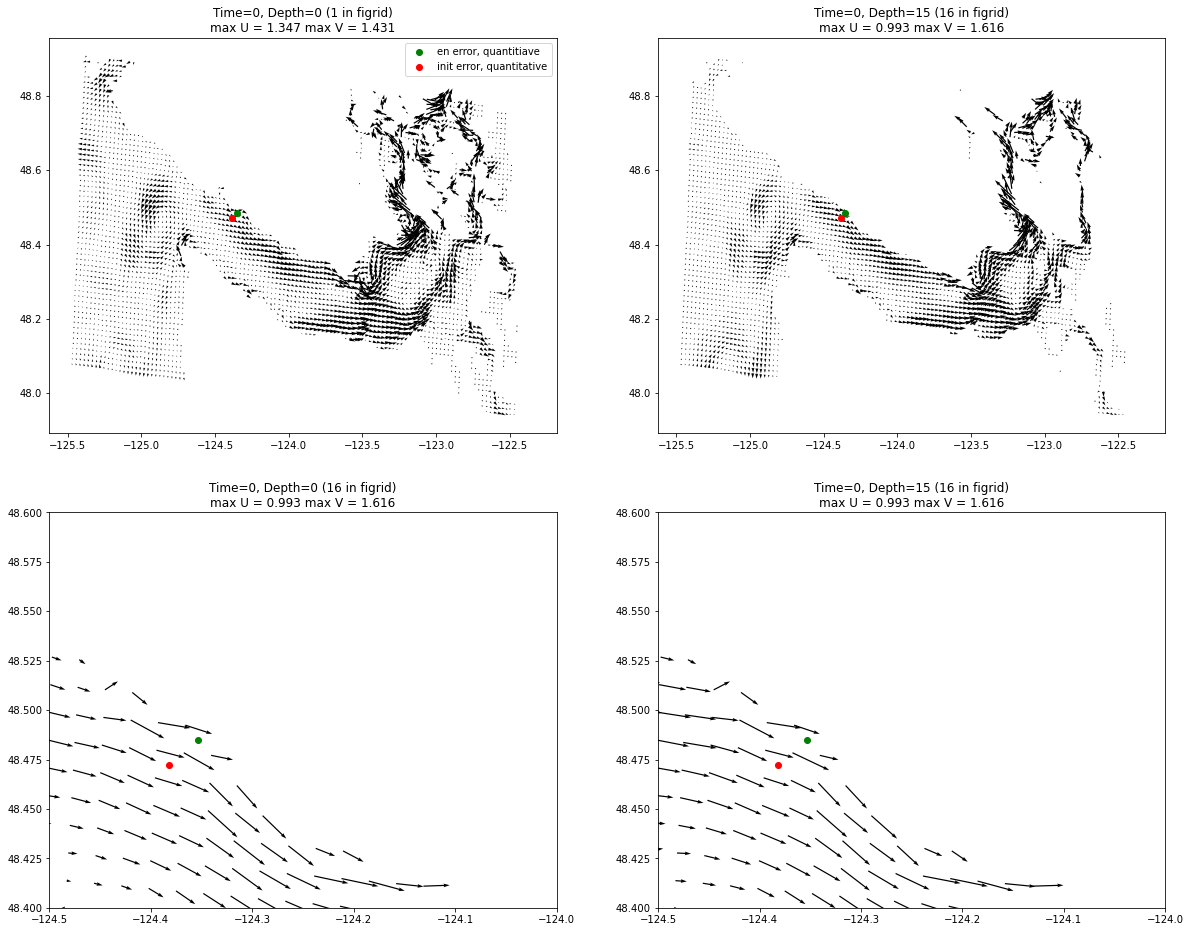

In [13]:
#time 0
fig,ax = plt.subplots(2,2,figsize=(20,16))
ax[0,0].quiver(Uart.nav_lon, Uart.nav_lat, Uart[0,:,:,0], Vart[0,:,:,0]) 
ax[0,0].scatter(mydata.nav_lon[273-1,641-1], mydata.nav_lat[273-1,641-1], c='g', label='en error, quantitiave')
ax[0,0].scatter(mydata.nav_lon[272-1,640-1], mydata.nav_lat[272-1,640-1], c='r', label='init error, quantitative')
ax[0,0].set_title('Time=0, Depth=0 (1 in figrid)\nmax U = '+str(np.round(Uart[0,:,:,0].max().values,3))+' max V = '+str(np.round(Vart[0,:,:,0].max().values,3)))
ax[0,0].legend()

ax[0,1].quiver(Uart.nav_lon, Uart.nav_lat, Uart[0,:,:,15], Vart[0,:,:,15]) 
ax[0,1].scatter(mydata.nav_lon[273-1,641-1], mydata.nav_lat[273-1,641-1], c='g', label='en error, quantitiave')
ax[0,1].scatter(mydata.nav_lon[272-1,640-1], mydata.nav_lat[272-1,640-1], c='r', label='init error, quantitative')
ax[0,1].set_title('Time=0, Depth=15 (16 in figrid)\nmax U = '+str(np.round(Uart[0,:,:,15].max().values,3))+' max V = '+str(np.round(Vart[0,:,:,15].max().values,3)))

ax[1,0].quiver(Uart.nav_lon, Uart.nav_lat, Uart[0,:,:,0], Vart[0,:,:,15], scale = 5) 
ax[1,0].scatter(mydata.nav_lon[273-1,641-1], mydata.nav_lat[273-1,641-1], c='g', label='en error, quantitiave')
ax[1,0].scatter(mydata.nav_lon[272-1,640-1], mydata.nav_lat[272-1,640-1], c='r', label='init error, quantitative')
ax[1,0].set_title('Time=0, Depth=0 (16 in figrid)\nmax U = '+str(np.round(Uart[0,:,:,15].max().values,3))+' max V = '+str(np.round(Vart[0,:,:,15].max().values,3)))
ax[1,0].set_ylim([48.4,48.6])
ax[1,0].set_xlim([-124.5, -124.0])

ax[1,1].quiver(Uart.nav_lon, Uart.nav_lat, Uart[0,:,:,15], Vart[0,:,:,15], scale = 5) 
ax[1,1].scatter(mydata.nav_lon[273-1,641-1], mydata.nav_lat[273-1,641-1], c='g', label='en error, quantitiave')
ax[1,1].scatter(mydata.nav_lon[272-1,640-1], mydata.nav_lat[272-1,640-1], c='r', label='init error, quantitative')
ax[1,1].set_title('Time=0, Depth=15 (16 in figrid)\nmax U = '+str(np.round(Uart[0,:,:,15].max().values,3))+' max V = '+str(np.round(Vart[0,:,:,15].max().values,3)))
ax[1,1].set_ylim([48.4,48.6])
ax[1,1].set_xlim([-124.5, -124.0])

(-124.5, -124.0)

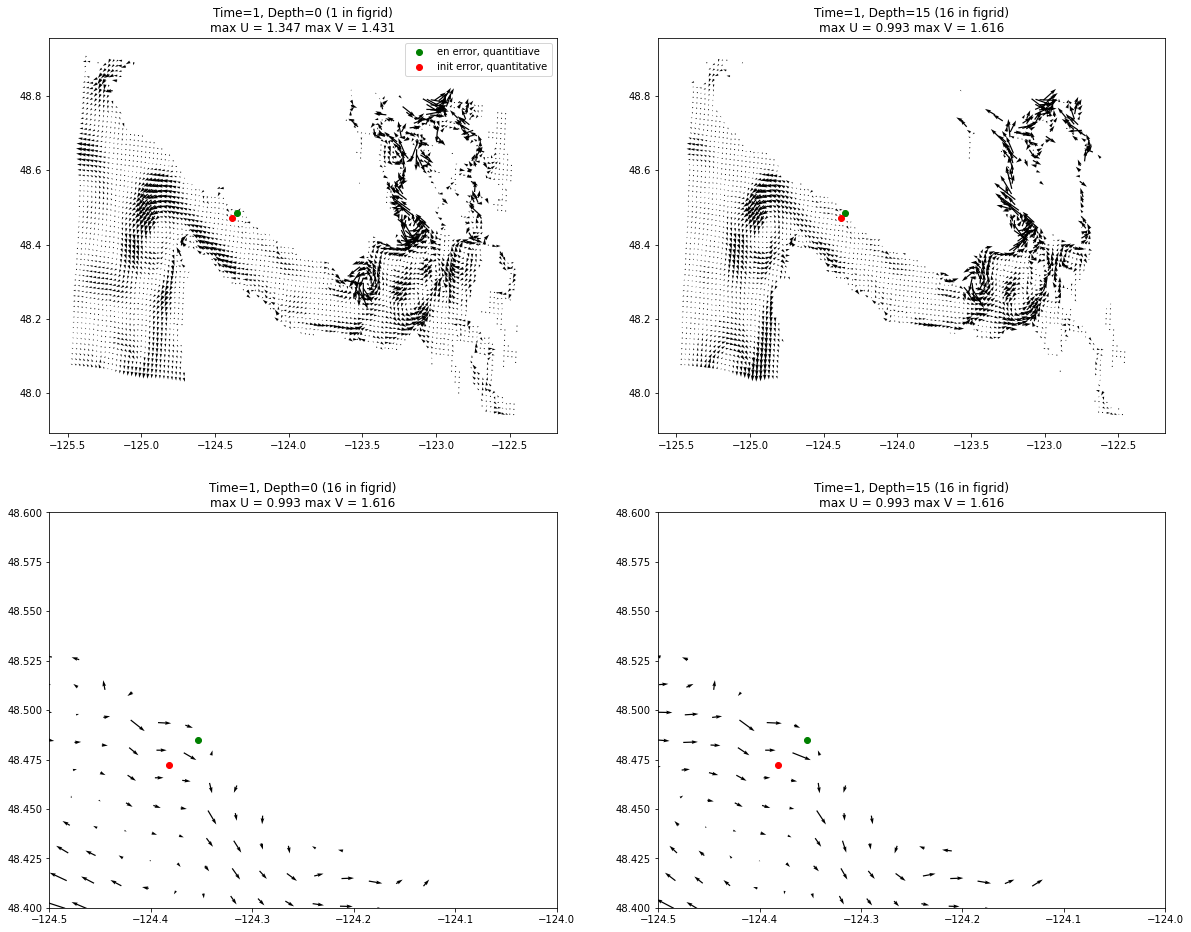

In [14]:
#time 1
fig,ax = plt.subplots(2,2,figsize=(20,16))
ax[0,0].quiver(Uart.nav_lon, Uart.nav_lat, Uart[1,:,:,0], Vart[1,:,:,0]) 
ax[0,0].scatter(mydata.nav_lon[273-1,641-1], mydata.nav_lat[273-1,641-1], c='g', label='en error, quantitiave')
ax[0,0].scatter(mydata.nav_lon[272-1,640-1], mydata.nav_lat[272-1,640-1], c='r', label='init error, quantitative')
ax[0,0].set_title('Time=1, Depth=0 (1 in figrid)\nmax U = '+str(np.round(Uart[0,:,:,0].max().values,3))+' max V = '+str(np.round(Vart[0,:,:,0].max().values,3)))
ax[0,0].legend()

ax[0,1].quiver(Uart.nav_lon, Uart.nav_lat, Uart[1,:,:,15], Vart[1,:,:,15]) 
ax[0,1].scatter(mydata.nav_lon[273-1,641-1], mydata.nav_lat[273-1,641-1], c='g', label='en error, quantitiave')
ax[0,1].scatter(mydata.nav_lon[272-1,640-1], mydata.nav_lat[272-1,640-1], c='r', label='init error, quantitative')
ax[0,1].set_title('Time=1, Depth=15 (16 in figrid)\nmax U = '+str(np.round(Uart[0,:,:,15].max().values,3))+' max V = '+str(np.round(Vart[0,:,:,15].max().values,3)))

ax[1,0].quiver(Uart.nav_lon, Uart.nav_lat, Uart[1,:,:,0], Vart[1,:,:,15], scale = 5) 
ax[1,0].scatter(mydata.nav_lon[273-1,641-1], mydata.nav_lat[273-1,641-1], c='g', label='en error, quantitiave')
ax[1,0].scatter(mydata.nav_lon[272-1,640-1], mydata.nav_lat[272-1,640-1], c='r', label='init error, quantitative')
ax[1,0].set_title('Time=1, Depth=0 (16 in figrid)\nmax U = '+str(np.round(Uart[0,:,:,15].max().values,3))+' max V = '+str(np.round(Vart[0,:,:,15].max().values,3)))
ax[1,0].set_ylim([48.4,48.6])
ax[1,0].set_xlim([-124.5, -124.0])

ax[1,1].quiver(Uart.nav_lon, Uart.nav_lat, Uart[1,:,:,15], Vart[1,:,:,15], scale = 5) 
ax[1,1].scatter(mydata.nav_lon[273-1,641-1], mydata.nav_lat[273-1,641-1], c='g', label='en error, quantitiave')
ax[1,1].scatter(mydata.nav_lon[272-1,640-1], mydata.nav_lat[272-1,640-1], c='r', label='init error, quantitative')
ax[1,1].set_title('Time=1, Depth=15 (16 in figrid)\nmax U = '+str(np.round(Uart[0,:,:,15].max().values,3))+' max V = '+str(np.round(Vart[0,:,:,15].max().values,3)))
ax[1,1].set_ylim([48.4,48.6])
ax[1,1].set_xlim([-124.5, -124.0])

#### idk about you but these quiver plots and max values look just sooooooooo reasonable to me
I think its a problem with how I've set up ariane - not the artificial tides files since a) these values look reasonable on the quivers and are in a resonable range in for max values and b) the numbers shown here are magnitudes off what ariane is saying is inthem in babypoo

In [ ]:
# pcolourmesh for hte velocities in the region for the same depth right below 

## multiply by vmask and umask and see if it looks any different!

In [84]:
xmesh.umask

<xarray.DataArray 'umask' (t: 1, z: 75, y: 1020, x: 714)>
[54621000 values with dtype=int8]
Dimensions without coordinates: t, z, y, x

In [95]:
Uart2

<xarray.DataArray 'vozocrtx' (t: 24, y: 1020, x: 714, z: 75)>
[1310904000 values with dtype=float64]
Coordinates:
  * t        (t) datetime64[ns] 2017-03-01T01:00:00 ... 2017-03-02
    nav_lat  (y, x) float32 ...
    nav_lon  (y, x) float32 ...
  * z        (z) float32 0.5075 1.558 2.669 ... 5.495e+03 5.698e+03 5.902e+03
Dimensions without coordinates: y, x

In [94]:
mydata = xr.open_dataset("/ocean/rbeutel/data/{:%Y%m}/U_new_{:%Y%m%d}.nc".format(startday[66],startday[66]), drop_variables=drop_vars)
Uart2 = mydata['vozocrtx'].rename({'depthu': 'z'}).rename({'time_counter': 't'})
mydata = xr.open_dataset("/ocean/rbeutel/data/{:%Y%m}/V_new_{:%Y%m%d}.nc".format(startday[66],startday[66]), drop_variables=drop_vars)
Vart2 = mydata['vomecrty'].rename({'depthv': 'z'}).rename({'time_counter': 't'})

In [102]:
Unew = Uart2*xmesh.umask[0,:,:,:]*xmesh.vmask[0,:,:,:]
Vnew = Vart2*xmesh.umask[0,:,:,:]*xmesh.vmask[0,:,:,:]

In [104]:
Unew = Unew[:,240:300, 600:,:]
Vnew = Vnew[:,240:300, 600:,:]

(-124.5, -124.0)

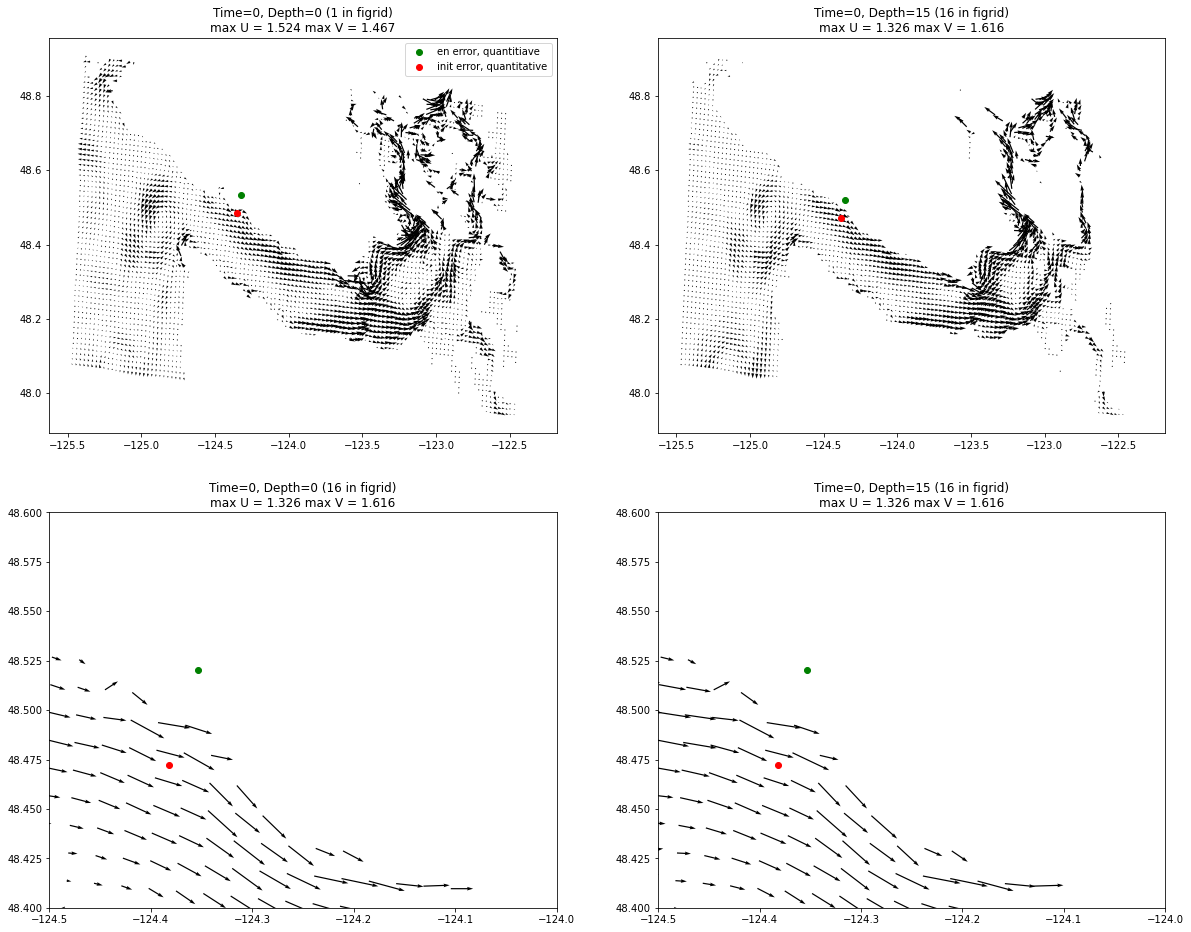

In [107]:
#time 0
fig,ax = plt.subplots(2,2,figsize=(20,16))
ax[0,0].quiver(Unew.nav_lon, Unew.nav_lat, Unew[0,:,:,0], Vnew[0,:,:,0]) 
ax[0,0].scatter(mydata.nav_lon[273,641], mydata.nav_lat[273,614], c='g', label='en error, quantitiave')
ax[0,0].scatter(mydata.nav_lon[272,640], mydata.nav_lat[272,640], c='r', label='init error, quantitative')
ax[0,0].set_title('Time=0, Depth=0 (1 in figrid)\nmax U = '+str(np.round(Uart[0,:,:,0].max().values,3))+' max V = '+str(np.round(Vart[0,:,:,0].max().values,3)))
ax[0,0].legend()

ax[0,1].quiver(Unew.nav_lon, Unew.nav_lat, Unew[0,:,:,15], Vnew[0,:,:,15]) 
ax[0,1].scatter(mydata.nav_lon[273-1,641-1], mydata.nav_lat[273-1,614-1], c='g', label='en error, quantitiave')
ax[0,1].scatter(mydata.nav_lon[272-1,640-1], mydata.nav_lat[272-1,640-1], c='r', label='init error, quantitative')
ax[0,1].set_title('Time=0, Depth=15 (16 in figrid)\nmax U = '+str(np.round(Uart[0,:,:,15].max().values,3))+' max V = '+str(np.round(Vart[0,:,:,15].max().values,3)))

ax[1,0].quiver(Unew.nav_lon, Unew.nav_lat, Unew[0,:,:,0], Vnew[0,:,:,15], scale = 5) 
ax[1,0].scatter(mydata.nav_lon[273-1,641-1], mydata.nav_lat[273-1,614-1], c='g', label='en error, quantitiave')
ax[1,0].scatter(mydata.nav_lon[272-1,640-1], mydata.nav_lat[272-1,640-1], c='r', label='init error, quantitative')
ax[1,0].set_title('Time=0, Depth=0 (16 in figrid)\nmax U = '+str(np.round(Uart[0,:,:,15].max().values,3))+' max V = '+str(np.round(Vart[0,:,:,15].max().values,3)))
ax[1,0].set_ylim([48.4,48.6])
ax[1,0].set_xlim([-124.5, -124.0])

ax[1,1].quiver(Unew.nav_lon, Unew.nav_lat, Unew[0,:,:,15], Vnew[0,:,:,15], scale = 5) 
ax[1,1].scatter(mydata.nav_lon[273-1,641-1], mydata.nav_lat[273-1,614-1], c='g', label='en error, quantitiave')
ax[1,1].scatter(mydata.nav_lon[272-1,640-1], mydata.nav_lat[272-1,640-1], c='r', label='init error, quantitative')
ax[1,1].set_title('Time=0, Depth=15 (16 in figrid)\nmax U = '+str(np.round(Uart[0,:,:,15].max().values,3))+' max V = '+str(np.round(Vart[0,:,:,15].max().values,3)))
ax[1,1].set_ylim([48.4,48.6])
ax[1,1].set_xlim([-124.5, -124.0])

(-124.5, -124.0)

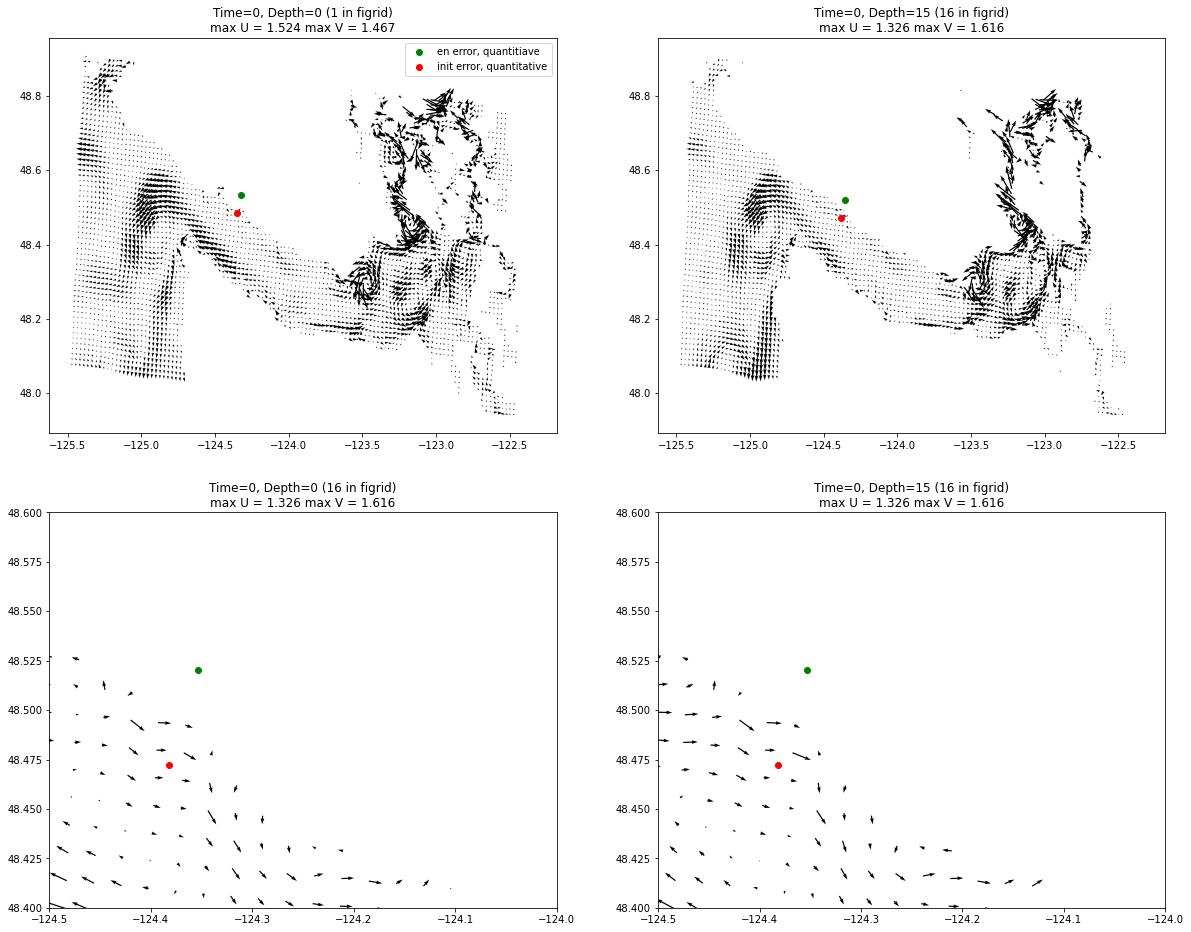

In [110]:
#time 0
fig,ax = plt.subplots(2,2,figsize=(20,16))
ax[0,0].quiver(Unew.nav_lon, Unew.nav_lat, Unew[1,:,:,0], Vnew[1,:,:,0]) 
ax[0,0].scatter(mydata.nav_lon[273,641], mydata.nav_lat[273,614], c='g', label='en error, quantitiave')
ax[0,0].scatter(mydata.nav_lon[272,640], mydata.nav_lat[272,640], c='r', label='init error, quantitative')
ax[0,0].set_title('Time=0, Depth=0 (1 in figrid)\nmax U = '+str(np.round(Uart[0,:,:,0].max().values,3))+' max V = '+str(np.round(Vart[0,:,:,0].max().values,3)))
ax[0,0].legend()

ax[0,1].quiver(Unew.nav_lon, Unew.nav_lat, Unew[1,:,:,15], Vnew[1,:,:,15]) 
ax[0,1].scatter(mydata.nav_lon[273-1,641-1], mydata.nav_lat[273-1,614-1], c='g', label='en error, quantitiave')
ax[0,1].scatter(mydata.nav_lon[272-1,640-1], mydata.nav_lat[272-1,640-1], c='r', label='init error, quantitative')
ax[0,1].set_title('Time=0, Depth=15 (16 in figrid)\nmax U = '+str(np.round(Uart[0,:,:,15].max().values,3))+' max V = '+str(np.round(Vart[0,:,:,15].max().values,3)))

ax[1,0].quiver(Unew.nav_lon, Unew.nav_lat, Unew[1,:,:,0], Vnew[1,:,:,15], scale = 5) 
ax[1,0].scatter(mydata.nav_lon[273-1,641-1], mydata.nav_lat[273-1,614-1], c='g', label='en error, quantitiave')
ax[1,0].scatter(mydata.nav_lon[272-1,640-1], mydata.nav_lat[272-1,640-1], c='r', label='init error, quantitative')
ax[1,0].set_title('Time=0, Depth=0 (16 in figrid)\nmax U = '+str(np.round(Uart[0,:,:,15].max().values,3))+' max V = '+str(np.round(Vart[0,:,:,15].max().values,3)))
ax[1,0].set_ylim([48.4,48.6])
ax[1,0].set_xlim([-124.5, -124.0])

ax[1,1].quiver(Unew.nav_lon, Unew.nav_lat, Unew[1,:,:,15], Vnew[1,:,:,15], scale = 5) 
ax[1,1].scatter(mydata.nav_lon[273-1,641-1], mydata.nav_lat[273-1,614-1], c='g', label='en error, quantitiave')
ax[1,1].scatter(mydata.nav_lon[272-1,640-1], mydata.nav_lat[272-1,640-1], c='r', label='init error, quantitative')
ax[1,1].set_title('Time=0, Depth=15 (16 in figrid)\nmax U = '+str(np.round(Uart[0,:,:,15].max().values,3))+' max V = '+str(np.round(Vart[0,:,:,15].max().values,3)))
ax[1,1].set_ylim([48.4,48.6])
ax[1,1].set_xlim([-124.5, -124.0])

In [111]:
### looks better at the coast than the previous one did! so redo the file-creation with the u-mask and v-mask multiplication

## that didnt fix it but did make is a smidge longer (fails on particle 102 instead of 2)
Now we check babypoo - where the code is saying the false start is we have the following information that may be useful for comparing to the file values <br>
tmask(x=641, y=273, z=15) = 0 (land) (or 1.0??)<br>
@ timestep 1 (march 1, 2017, hour 1):<br>
vozocrtx(x=641, y=273, z=15, t=0) = 0.295 (or 0.27??)<br>
vomecrty(x=641, y=273, z=15, t=0) = -0.072 (or -0.062??)<br>

In [30]:
xmesh.tmask[0,15,y,x] # already disagrees with babypoo! - water=1, land=0

<xarray.DataArray 'tmask' ()>
array(1, dtype=int8)

In [31]:
Uart[1,y,x,15]

<xarray.DataArray 'vozocrtx' ()>
array(-0.071829)
Coordinates:
    depthu        float32 35.74
    time_counter  datetime64[ns] 2017-03-01T02:00:00
    nav_lat       float32 ...
    nav_lon       float32 ...

In [32]:
Vart[1,y,x,15]

<xarray.DataArray 'vomecrty' ()>
array(-0.390668)
Coordinates:
    depthv        float32 35.74
    time_counter  datetime64[ns] 2017-03-01T02:00:00
    nav_lat       float32 ...
    nav_lon       float32 ...

In [27]:
Vart[1,y,x,:]

<xarray.DataArray 'vomecrty' (depthv: 75)>
array([-0.382047, -0.382762, -0.383332, -0.383712, -0.384134, -0.38488 ,
       -0.386359, -0.386481, -0.386447, -0.386389, -0.387215, -0.388122,
       -0.388285, -0.389023, -0.388938, -0.390668, -0.397288, -0.399989,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan])
Coordinates:
  * depthv        (depthv) float32 0.5075 1.558 2.669 ... 5.698e+03 5.902e+03
    time_counter  datetime64[ns] 2017-03-01T02:00:00
    nav_lat       float32 ...
    nav_lon       float32 ...